Program ini dibuat untuk melakukan automatisasi pengolahan (cleaning) data text yang berguna untuk pemodelan model analisa sentimen.

Source URL Dataset : https://www.kaggle.com/datasets/ssarkar445/electric-vehicle-population



### Identifikasi Masalah

Problem Statement : Apakah semakin muda tahun produksi mobil elektrik dapat berpengaruh terhadap jarak tempuhnya pada mobil dari Company Tesla

Analisi SMART :

Specific : Menentukan apakah ada korelasi dari antara tahun produksi mobil listrik dan jarak tempuhnya pada mobil Tesla

Measurable : Mengukur mobil Tesla model apa dan tahun berapa di produksi yang terbaik

Achievable : Dengan analisa ini diharapkan dapat meningkatkan sales sebesar 5% pada penjualan mobil listrik Tesla

Relevant: analisi ini relevan untuk pemahaman pengaruh tahun produksi terhadap jarak tempuh mobil listrik Tesla.

Time-Bound : Tujuan dari analisis data ini akan disampaikan dalam bentuk laporan dari data 5 tahun terakhir

5 W 1 H

What : Analisa ini berkaitan dengan korelasi antara tahun produksi mobil dengan jarak tempuhnya pada mobil Tesla.

Why : Analisa ini dilakukan untuk mengukur mobil Tesla model apa dan tahun berapa yang baik dalam hal jarak tempuh.

Who : Tujuan analisa untuk meningkatkan penjualan mobil listrik Tesla sebesar 5% yang dapat dimanfaatkan dan diterima oleh perusahaan Tesla
      dan tim Sales.

When : Analisis ini dilakukan pada data tahun 2015 sampai 2020

Where : Analisis ini dilakukan pada data dari mobil Tesla yang diproduksi dalam beberapa tahun terakhir berdasarkan populasi di beberapa daerah

How : Analisis ini akan melibatkan pengubahan tipe data pada kolom 'Electric Range' dan 'Model Year', pengelompokkan data berdasarkan tahun, Penyebaran mobil Tesla, perhitungan rata-rata jarak tempuh untuk setiap tahun, dan pembuatan visualisasi data berupa grafik garis untuk menampilkan tren.



##### Latar Belakang

Dalam beberapa tahun terakhir, mobil listrik terus berkembang pesat dan menjadi salah satu pilihan kendaraan yang ramah lingkungan. Salah satu company yang terus mengalami perkembangan pesat adalah Tesla. Tesla telah memproduksi berbagai model mobil listrik yang populer, termasuk Model S, Model 3, Model X, dan Model Y. Masing-masing model ini memiliki karakteristik yang berbeda dalam hal desain, kinerja, daya jangkauan, dan fitur-fitur canggih. Dalam analisis ini terkait dengan mobil listrik yang khususnya dari perusahaan Tesla yang dapat membantu memahami perbedaan pada model Tesla satu sama lain, perkembangan mobil Tesla tiap tahunnya.

### Data Loading

In [56]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import modul yang akan dipakai

### Data Exploration

In [57]:
df = pd.read_csv('Electric_Vehicle_Population.csv')

df

# kode diatas untuk membaca data 

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3MW5P9J05N,Arapahoe,Englewood,CO,80111.0,2022,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,200589147,POINT (-104.89239 39.61914),NaN,8.005007e+09
1,5YJXCBE27J,Island,Greenbank,WA,98253.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,10.0,326880081,POINT (-122.575569 48.08489),NaN,5.302997e+10
2,1N4AZ0CP3F,Kings,Lemoore,CA,93245.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,NaN,182237457,POINT (-119.78637 36.30101),NaN,6.031980e+09
3,5YJ3E1EA8J,San Diego,Oceanside,CA,92051.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,153998050,NaN,NaN,6.073019e+09
4,5YJ3E1EB1K,Alameda,Berkeley,CA,94710.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,320914072,POINT (-122.300531 37.869271),NaN,6.001423e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109476,KM8K33AGXN,Whatcom,Bellingham,WA,98229.0,2022,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,40.0,176212200,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
109477,5YJ3E1EB2N,King,Sammamish,WA,98075.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41.0,185637224,POINT (-122.028168 47.586173),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
109478,5YJYGDEE9M,Snohomish,Bothell,WA,98021.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,153892070,POINT (-122.212105 47.792368),PUGET SOUND ENERGY INC,5.306105e+10
109479,1N4AZ1CP0J,King,Shoreline,WA,98133.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.0,289064191,POINT (-122.343983 47.739969),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10


Dataset Electric Vehicle Population memiliki 109481 rows dan 17 columns

In [58]:
df.columns

# df.columns untuk melihat kolom apa saja yang ada di dataset

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [59]:
unique_model = df['Model'].unique()
unique_company = df['Make'].unique()
unique_range = df['Electric Range'].unique()
unique_year = df['Model Year'].unique()

print("Nilai unik model", unique_model)
print("Nilai unik company", unique_company)
print("Nilai unik range", unique_range)
print("Nilai unik year", unique_year)

# Melihat unique dari beberapa kolom

Nilai unik model ['330E' 'MODEL X' 'LEAF' 'MODEL 3' 'MODEL S' 'FUSION' 'VOLT' 'E-GOLF' 'X5'
 'EQ FORTWO' 'I3' 'PRIUS PRIME' '500' 'PACIFICA' 'NIRO' 'EV6' 'XC60'
 'RAV4 PRIME' 'SOUL' 'SANTA FE' 'MODEL Y' 'PRIUS PLUG-IN' 'GLE-CLASS'
 'CAYENNE' 'BOLT EV' 'XC90' 'R1T' 'MUSTANG MACH-E' 'Q5' 'HARDTOP'
 'E-TRON GT' 'C-MAX' 'SORENTO' 'E-TRON' 'SPARK' 'XC40' 'SPORTAGE'
 'PANAMERA' 'KONA ELECTRIC' 'CROSSTREK' 'COUNTRYMAN' 'FOCUS' 'X3'
 'E-TRON SPORTBACK' 'CLARITY' 'WRANGLER' 'TRANSIT' 'SOUL EV' 'Q5 E' 'ID.4'
 'A3' 'OUTLANDER' 'IONIQ 5' 'EDV' 'KONA' 'S90' 'SONATA' 'BOLT EUV' 'S60'
 'B-CLASS' 'PS2' 'C40' 'GLC-CLASS' 'TAYCAN' 'OPTIMA'
 'FORTWO ELECTRIC DRIVE' 'CORSAIR' 'I-PACE' 'AVIATOR' 'IONIQ'
 'EQS-CLASS SEDAN' '530E' 'ESCAPE' 'Q4' 'ELR' 'I4' 'EQB-CLASS' 'F-150'
 'IX' 'RANGE ROVER' 'RAV4' 'ROADSTER' 'NX' 'I8' 'G80' 'A7' 'I-MIEV'
 'FORTWO' 'CT6' '745E' 'TUCSON' 'RS E-TRON GT' '745LE' 'RANGE ROVER SPORT'
 'KARMA' nan 'CITY' 'S-CLASS' 'R1S' '740E' 'V60' 'GV60' 'C-CLASS' 'ACCORD'
 'RANGER' 'LUCID AI

In [60]:
df.info()

# untuk mengecek informasi dari dataset seperi total data dan type data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109481 entries, 0 to 109480
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         109481 non-null  object 
 1   County                                             109480 non-null  object 
 2   City                                               109480 non-null  object 
 3   State                                              109481 non-null  object 
 4   Postal Code                                        109480 non-null  float64
 5   Model Year                                         109481 non-null  int64  
 6   Make                                               109481 non-null  object 
 7   Model                                              109474 non-null  object 
 8   Electric Vehicle Type                              109481 non-null  object

In [61]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,109480.000000,109481.000000,109481.000000,109481.000000,109205.000000,1.094810e+05,1.094800e+05
mean,98157.012943,2018.899197,90.211425,1849.194609,29.824120,1.984476e+08,5.296849e+10
std,2640.605503,2.872853,102.575715,10946.085012,14.679959,9.561719e+07,1.675104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.467313e+08,5.303301e+10
50%,98121.000000,2019.000000,35.000000,0.000000,34.000000,1.874118e+08,5.303303e+10
75%,98370.000000,2021.000000,208.000000,0.000000,43.000000,2.169176e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


### Data Cleaning

In [62]:
df.isnull().sum()

# menghitung jumlah dari missing value di setiap kolom

VIN (1-10)                                             0
County                                                 1
City                                                   1
State                                                  0
Postal Code                                            1
Model Year                                             0
Make                                                   0
Model                                                  7
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 276
DOL Vehicle ID                                         0
Vehicle Location                                      25
Electric Utility                                     428
2020 Census Tract                                      1
dtype: int64

In [63]:
# df.rename(columns={'County' : 'Country'}, inplace=True)

# df

# Mengganti nama kolom County menjadi Country

In [64]:
unique_model = df['Model'].unique()
unique_company = df['Make'].unique()
unique_range = df['Electric Range'].unique()
unique_year = df['Model Year'].unique()

print("Nilai unik model", unique_model)
print("Nilai unik company", unique_company)
print("Nilai unik range", unique_range)
print("Nilai unik year", unique_year)



Nilai unik model ['330E' 'MODEL X' 'LEAF' 'MODEL 3' 'MODEL S' 'FUSION' 'VOLT' 'E-GOLF' 'X5'
 'EQ FORTWO' 'I3' 'PRIUS PRIME' '500' 'PACIFICA' 'NIRO' 'EV6' 'XC60'
 'RAV4 PRIME' 'SOUL' 'SANTA FE' 'MODEL Y' 'PRIUS PLUG-IN' 'GLE-CLASS'
 'CAYENNE' 'BOLT EV' 'XC90' 'R1T' 'MUSTANG MACH-E' 'Q5' 'HARDTOP'
 'E-TRON GT' 'C-MAX' 'SORENTO' 'E-TRON' 'SPARK' 'XC40' 'SPORTAGE'
 'PANAMERA' 'KONA ELECTRIC' 'CROSSTREK' 'COUNTRYMAN' 'FOCUS' 'X3'
 'E-TRON SPORTBACK' 'CLARITY' 'WRANGLER' 'TRANSIT' 'SOUL EV' 'Q5 E' 'ID.4'
 'A3' 'OUTLANDER' 'IONIQ 5' 'EDV' 'KONA' 'S90' 'SONATA' 'BOLT EUV' 'S60'
 'B-CLASS' 'PS2' 'C40' 'GLC-CLASS' 'TAYCAN' 'OPTIMA'
 'FORTWO ELECTRIC DRIVE' 'CORSAIR' 'I-PACE' 'AVIATOR' 'IONIQ'
 'EQS-CLASS SEDAN' '530E' 'ESCAPE' 'Q4' 'ELR' 'I4' 'EQB-CLASS' 'F-150'
 'IX' 'RANGE ROVER' 'RAV4' 'ROADSTER' 'NX' 'I8' 'G80' 'A7' 'I-MIEV'
 'FORTWO' 'CT6' '745E' 'TUCSON' 'RS E-TRON GT' '745LE' 'RANGE ROVER SPORT'
 'KARMA' nan 'CITY' 'S-CLASS' 'R1S' '740E' 'V60' 'GV60' 'C-CLASS' 'ACCORD'
 'RANGER' 'LUCID AI

In [65]:
df = df.dropna()

df.isnull().sum()

# df.dropna untuk menghilangkan mising value di data

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [66]:
filtered_data = df[(df['Model Year'] >= 2015) & (df['Model Year'] <= 2020)]

selected_columns = filtered_data[['Model', 'Make', 'Electric Range']]

# Kode diatas untuk mengelompokan data dengan ketentuan Model Year dari 2015 hingga 2020

# Menampilkan hasilnya
selected_columns

,Model,Make,Electric Range
8,LEAF,NISSAN,107
10,E-GOLF,VOLKSWAGEN,125
11,MODEL 3,TESLA,215
13,MODEL 3,TESLA,322
15,EQ FORTWO,SMART,58
...,...,...,...
109462,FUSION,FORD,19
109465,MODEL 3,TESLA,308
109466,MODEL S,TESLA,210
109473,FUSION,FORD,19


In [67]:
grouped_df = filtered_data.groupby('Make')['Electric Range'].mean().reset_index()

grouped_df

,Make,Electric Range
0,AUDI,81.697046
1,BENTLEY,18.000000
2,BMW,57.227081
3,CADILLAC,33.882353
4,CHEVROLET,156.311755
5,CHRYSLER,32.611798
6,FIAT,85.174757
7,FORD,23.174005
8,HONDA,47.000000
9,HYUNDAI,145.821346


In [68]:
# df['Make'] = np.where((df['Model Year']>= 2015) & (df['Model Year'] <= 2020))

# df

df['Make'] = np.where((df['Model Year'] >= 2015) & (df['Model Year'] <= 2020), df['Make'], 'Tidak Diketahui')

# Menampilkan DataFrame
df.head()

# filtered_data = df[(df['Model Year'] >= 2015) & (df['Model Year'] <= 2020)]

# selected_columns = filtered_data[['Model', 'Make', 'Electric Range']]

C:\Users\athal\AppData\Local\Temp\ipykernel_15332\1861439541.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Make'] = np.where((df['Model Year'] >= 2015) & (df['Model Year'] <= 2020), df['Make'], 'Tidak Diketahui')


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
8,1N4BZ0CP8H,Chelan,Wenatchee,WA,98801.0,2017,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,107,0,12.0,192768747,POINT (-120.336499 47.425146),PUD NO 1 OF CHELAN COUNTY,5.300796e+10
10,WVWKR7AU3K,Snohomish,Edmonds,WA,98026.0,2019,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,125,0,32.0,477565112,POINT (-122.333046 47.829439),PUGET SOUND ENERGY INC,5.306105e+10
11,5YJ3E1EB0J,Island,Clinton,WA,98236.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,476402678,POINT (-122.35803 47.9796),PUGET SOUND ENERGY INC,5.302997e+10
13,5YJ3E1EBXL,Snohomish,Brier,WA,98036.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,1.0,103288153,POINT (-122.281856 47.811678),PUGET SOUND ENERGY INC,5.306105e+10
14,5UXTA6C00M,Island,Langley,WA,98260.0,2021,Tidak Diketahui,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,10.0,132882725,POINT (-122.438132 48.029812),PUGET SOUND ENERGY INC,5.302997e+10


In [69]:
filtered_df = df[(df['Model Year'] >= 2015) & (df['Model Year'] <= 2020) ]

# Mengambil kolom 'Model', 'Make', dan 'Electric Range'
selected_columns = filtered_df[['Model', 'Make', 'Electric Range', 'Model Year']]

selected_columns = selected_columns[selected_columns['Make'] == 'TESLA']

# Menampilkan hasilnya
# selected_columns.head(20).sort_values(by='Electric Range', ascending=False)

# filtering lagi untuk mengambil company tesla, semua model aja yang dari 2015 > 2020 aja

In [70]:
selected_columns.sort_values(by='Electric Range', ascending=False)

,Model,Make,Electric Range,Model Year
35800,MODEL S,TESLA,337,2020
54906,MODEL S,TESLA,337,2020
46749,MODEL S,TESLA,337,2020
3514,MODEL S,TESLA,337,2020
22259,MODEL S,TESLA,337,2020
...,...,...,...,...
9517,MODEL X,TESLA,200,2017
78555,MODEL X,TESLA,200,2016
9533,MODEL X,TESLA,200,2017
18557,MODEL X,TESLA,200,2016


In [71]:
# selected_columns.isnull()
selected_columns.isnull().sum()

Model             0
Make              0
Electric Range    0
Model Year        0
dtype: int64

In [72]:
# for kolom in df.columns:
#     if df[kolom].isnull().any():
#         print(f'Kolom {kolom} memiliki missing value.')

# for kolom in df.columns:
#     jumlah_missing = df[kolom].isnull().sum()
#     if jumlah_missing > 0:
#         print(f'Kolom {kolom} memiliki {jumlah_missing} missing value.')

In [73]:
kolom_tertentu = 'Model'

# Memunculkan missing value dalam kolom tertentu
missing_values = df[df[kolom_tertentu].isnull()]
print(f'Missing value dalam kolom {kolom_tertentu}:\n{missing_values}')


Missing value dalam kolom Model:
Empty DataFrame
Columns: [VIN (1-10), County, City, State, Postal Code, Model Year, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle (CAFV) Eligibility, Electric Range, Base MSRP, Legislative District, DOL Vehicle ID, Vehicle Location, Electric Utility, 2020 Census Tract]
Index: []


### Data Cleaning

In [74]:
cleandata = df.dropna()

In [75]:
cleandata.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [76]:
selected_columns['Model'].unique()



array(['MODEL 3', 'MODEL S', 'MODEL X', 'MODEL Y'], dtype=object)

In [77]:
selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23743 entries, 11 to 109466
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Model           23743 non-null  object
 1   Make            23743 non-null  object
 2   Electric Range  23743 non-null  int64 
 3   Model Year      23743 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 927.5+ KB


In [78]:
duplicate = selected_columns[selected_columns.duplicated()]

# Menampilkan data-data yang duplikat
print("Duplicate Data:")
duplicate

Duplicate Data:


,Model,Make,Electric Range,Model Year
19,MODEL 3,TESLA,215,2018
23,MODEL 3,TESLA,215,2018
38,MODEL 3,TESLA,215,2018
42,MODEL 3,TESLA,215,2018
46,MODEL 3,TESLA,215,2018
...,...,...,...,...
109454,MODEL 3,TESLA,220,2019
109457,MODEL 3,TESLA,266,2020
109459,MODEL 3,TESLA,215,2018
109465,MODEL 3,TESLA,308,2020


In [79]:
selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23743 entries, 11 to 109466
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Model           23743 non-null  object
 1   Make            23743 non-null  object
 2   Electric Range  23743 non-null  int64 
 3   Model Year      23743 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 927.5+ KB


In [80]:
# selected_columns['Model Year'] = pd.to_datetime(selected_columns['Model Year'], format='%Y')
# selected_columns['Model Year'] = selected_columns['Model Year'].dt.year.astype()
# selected_columns['Model Year'] = selected_columns['Model Year'].dt.year

# selected_columns['Model Year'] = pd.to_datetime(selected_columns['Model Year'], format='%Y').dt.year


# Convert the 'Model Year' column to datetime
# selected_columns['Model Year'] = pd.to_datetime(selected_columns['Model Year'], format='%Y')

# Extract only the year and format it as a string
# selected_columns['Model Year'] = selected_columns['Model Year'].dt.strftime('%Y')

In [81]:
selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23743 entries, 11 to 109466
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Model           23743 non-null  object
 1   Make            23743 non-null  object
 2   Electric Range  23743 non-null  int64 
 3   Model Year      23743 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 927.5+ KB


In [82]:
# selected_columns['Make'].rename

selected_columns.rename(columns={'Make' : 'Company'}, inplace= True)

selected_columns

,Model,Company,Electric Range,Model Year
11,MODEL 3,TESLA,215,2018
13,MODEL 3,TESLA,322,2020
19,MODEL 3,TESLA,215,2018
23,MODEL 3,TESLA,215,2018
25,MODEL S,TESLA,270,2019
...,...,...,...,...
109454,MODEL 3,TESLA,220,2019
109457,MODEL 3,TESLA,266,2020
109459,MODEL 3,TESLA,215,2018
109465,MODEL 3,TESLA,308,2020


In [83]:
selected_columns

,Model,Company,Electric Range,Model Year
11,MODEL 3,TESLA,215,2018
13,MODEL 3,TESLA,322,2020
19,MODEL 3,TESLA,215,2018
23,MODEL 3,TESLA,215,2018
25,MODEL S,TESLA,270,2019
...,...,...,...,...
109454,MODEL 3,TESLA,220,2019
109457,MODEL 3,TESLA,266,2020
109459,MODEL 3,TESLA,215,2018
109465,MODEL 3,TESLA,308,2020


In [84]:
# duplicate = selected_columns[selected_columns.duplicated()]

# # Menampilkan data-data yang duplikat
# print("Duplicate Data:")
# duplicate

selected_columns.drop_duplicates(inplace=True, ignore_index=True)
selected_columns

,Model,Company,Electric Range,Model Year
0,MODEL 3,TESLA,215,2018
1,MODEL 3,TESLA,322,2020
2,MODEL S,TESLA,270,2019
3,MODEL 3,TESLA,220,2019
4,MODEL 3,TESLA,308,2020
5,MODEL X,TESLA,289,2020
6,MODEL S,TESLA,208,2015
7,MODEL Y,TESLA,291,2020
8,MODEL S,TESLA,249,2018
9,MODEL 3,TESLA,266,2020


In [85]:
selected_columns.sort_values(by='Model Year', ascending=False)

,Model,Company,Electric Range,Model Year
19,MODEL S,TESLA,337,2020
12,MODEL X,TESLA,293,2020
4,MODEL 3,TESLA,308,2020
5,MODEL X,TESLA,289,2020
17,MODEL S,TESLA,330,2020
7,MODEL Y,TESLA,291,2020
9,MODEL 3,TESLA,266,2020
1,MODEL 3,TESLA,322,2020
2,MODEL S,TESLA,270,2019
3,MODEL 3,TESLA,220,2019


In [86]:
selected_columns.count()

Model             20
Company           20
Electric Range    20
Model Year        20
dtype: int64

In [87]:
newdf = filtered_df.query('Make == "TESLA"').groupby(['Model', 'Make', 'Electric Range', 'Model Year']).aggregate({'County':'count'})

newdf

# filtered_df

County
Model   Make  Electric Range Model Year        
MODEL 3 TESLA 215            2018          6119
              220            2017            63
                             2019          3856
              266            2020          1495
              308            2020           504
              322            2020          1665
MODEL S TESLA 208            2015          1089
              210            2016           970
                             2017           935
              249            2018           924
              270            2019           248
              330            2020           308
              337            2020            67
MODEL X TESLA 200            2016           658
                             2017           675
              238            2018           896
              289            2019           370
                             2020           221
              293            2020           425
MODEL Y TESLA 291            2020          2255

In [88]:
newdf.to_csv("dataTesla.csv", index=False)

In [89]:
data = pd.read_csv('dataTesla.csv')

selected_columns['Count County'] = data['County']


In [90]:
selected_columns

,Model,Company,Electric Range,Model Year,Count County
0,MODEL 3,TESLA,215,2018,6119
1,MODEL 3,TESLA,322,2020,63
2,MODEL S,TESLA,270,2019,3856
3,MODEL 3,TESLA,220,2019,1495
4,MODEL 3,TESLA,308,2020,504
5,MODEL X,TESLA,289,2020,1665
6,MODEL S,TESLA,208,2015,1089
7,MODEL Y,TESLA,291,2020,970
8,MODEL S,TESLA,249,2018,935
9,MODEL 3,TESLA,266,2020,924


In [91]:
selected_columns.to_csv("dataTesla.csv", index=False)

In [92]:
dataClean = pd.read_csv('dataTesla.csv')

dataClean.sort_values(by='Electric Range', ascending=False)

,Model,Company,Electric Range,Model Year,Count County
19,MODEL S,TESLA,337,2020,2255
17,MODEL S,TESLA,330,2020,221
1,MODEL 3,TESLA,322,2020,63
4,MODEL 3,TESLA,308,2020,504
12,MODEL X,TESLA,293,2020,67
7,MODEL Y,TESLA,291,2020,970
5,MODEL X,TESLA,289,2020,1665
16,MODEL X,TESLA,289,2019,370
2,MODEL S,TESLA,270,2019,3856
9,MODEL 3,TESLA,266,2020,924


Menurut dari data berikut, sejak tahun 2015 Hingga 2020 Tesla memiliki 4 Model mobil yaitu Model 3, Model S, Model X, Model Y. Model yang memiliki Electric Range terjauh adalah Tesla Model S tahun produksi 2020 dengan Electric Range 337

### Analisis dan Perhitungan

In [93]:
dataClean.describe()

,Electric Range,Model Year,Count County
count,20.000000,20.000000,20.000000
mean,258.250000,2018.450000,1187.150000
std,46.745532,1.637553,1460.859598
min,200.000000,2015.000000,63.000000
25%,213.750000,2017.000000,354.500000
50%,257.500000,2019.000000,785.500000
75%,291.500000,2020.000000,1190.500000
max,337.000000,2020.000000,6119.000000


In [107]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Model           20 non-null     object
 1   Company         20 non-null     object
 2   Electric Range  20 non-null     int64 
 3   Model Year      20 non-null     int64 
 4   Count County    20 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 932.0+ bytes


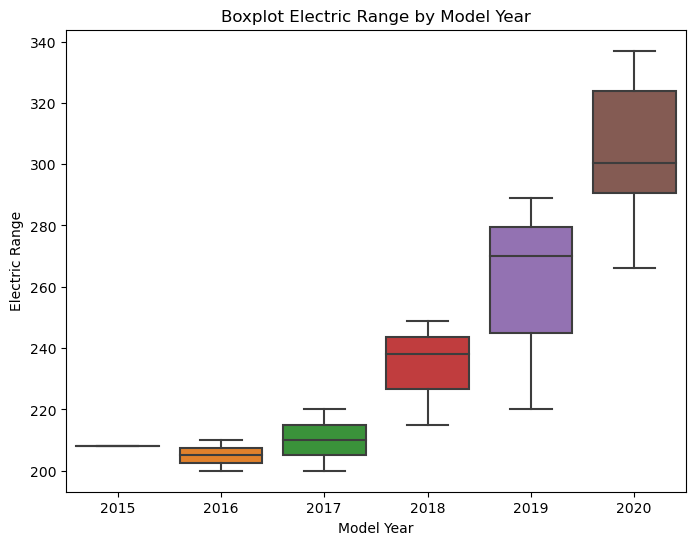

In [129]:
# Konversi data ke DataFrame
import pandas as pd
# df = pd.DataFrame(data)

# Membuat boxplot untuk Model Year
plt.figure(figsize=(8, 6))
sns.boxplot(x="Model Year", y="Electric Range", data=dataClean)
plt.title("Boxplot Electric Range by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Electric Range")
plt.show()


In [108]:
missing_data = dataClean[dataClean["Electric Range"].isnull() | dataClean["Model Year"].isnull()]
print(missing_data)

Empty DataFrame
Columns: [Model, Company, Electric Range, Model Year, Count County]
Index: []


In [132]:
yearElec = dataClean.groupby('Model Year')['Electric Range'].max()

In [134]:
skewyear = stats.skew(yearElec)
print(f"skewness data = {skewyear}")

# Menghitung skewness berdasarkan Model Year dan Electric Range

skewness data = 0.7420196562383297


In [119]:
# Mengelompokan data berdasarkan Model dan menghitung total Electric Range

total = dataClean.groupby('Model')['Electric Range'].sum()

# Menampilkan total
print(total)

# Menampilkan statistik deskriptif dari kolom 'Electric Range' dalam total
print(total.describe())

# Menemukan Mobil Tesla dengan Electric Range terjauh


top1 = dataClean[dataClean['Electric Range'] == dataClean['Electric Range'].max()]
print("Mobil Tesla dengan Electric Range terjauh: ",top1[['Model', 'Model Year']].values[0])
print("Electric Range terjauh: ",top1['Electric Range'].values[0])



Model
MODEL 3    1551
MODEL S    1814
MODEL X    1509
MODEL Y     291
Name: Electric Range, dtype: int64
count       4.000000
mean     1291.250000
std       680.355973
min       291.000000
25%      1204.500000
50%      1530.000000
75%      1616.750000
max      1814.000000
Name: Electric Range, dtype: float64
Mobil Tesla dengan Electric Range terjauh:  ['MODEL S' 2020]
Electric Range terjauh:  337


Dari coding diatas didapatkan Model 3 berjumlah 1551, Model S 1814, Model X 1509, Model Y 291  
Mobil Tesla yang memiliki Electric Range terjauh adalah Model S dengan tahun produksi 2020  
Electric Terjauh dari Mobil Tesla adalah 337

In [130]:
from scipy.stats import f_oneway

# Mengelompokkan data berdasarkan Model Year
grouped_data = [data['Electric Range'][data['Model Year'] == year] for year in data['Model Year'].unique()]

# Melakukan uji ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 12.79421838669289
P-value: 8.291885049617424e-05


HO: Tidak ada perbedaan signifikan antara Model Year dan Electric Range
H1: Ada perbedaan yang signifikan antara Model Year dan Electric Range

karena pvalue jauh lebih besar dari 0.05 maka H0 ditolak maka H1 diterima, berarti ada perbedaan yang signifikan antara Model Year dan Electric Range

In [122]:
# Memilih data Electric Range untuk Model S dari Model

model_s_data = dataClean[dataClean['Model'] == 'MODEL S']['Electric Range']

# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) dari data 'Global_Sales'
q1 = model_s_data.quantile(0.25)
q3 = model_s_data.quantile(0.75)

# Menghitung interquartile range (IQR)
iqr = q3 - q1

# Menghitung batas atas (upper boundary) dan batas bawah (lower boundary) untuk menentukan outlier
up_bound = q3 + 1.5 * iqr
low_bound = q1 - 1.5 * iqr

# Menampilkan nilai batas atas dan batas bawah
print(f'Upper Boundary: {up_bound:.2f}')
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 435.00
Lower Boundary: 75.00


In [126]:
outlier = model_s_data[(model_s_data < low_bound) | (model_s_data > up_bound)]

no_outlier = model_s_data[(model_s_data >= low_bound) | (model_s_data <= up_bound)]

percentage_of_outliers = len(outlier) * 100 / len(model_s_data)

print(f'Percentage of outliers: {percentage_of_outliers: }%')

Percentage of outliers:  0.0%


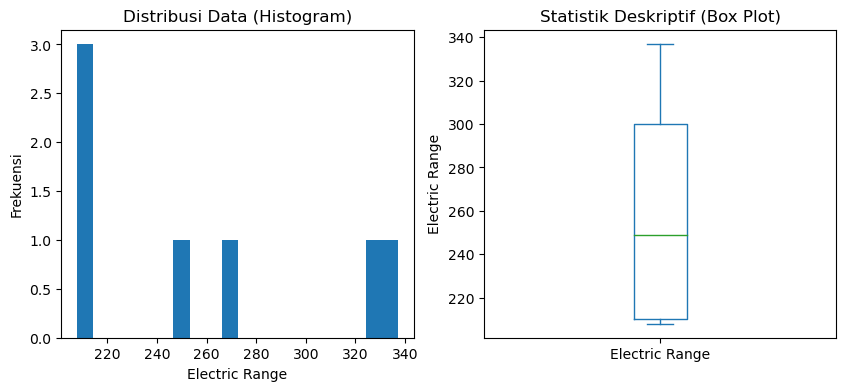

In [128]:
# Membuat gambar dengan dua subplot bersebelahan
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

# Membuat histogram dari data 'no_outlier' dan menampilkannya di subplot pertama
no_outlier.plot(kind='hist', bins=20, ax=ax[0])
ax[0].set_title('Distribusi Data (Histogram)')
ax[0].set_xlabel('Electric Range')
ax[0].set_ylabel('Frekuensi')

# Membuat box plot dari data 'no_outlier' dan menampilkannya di subplot kedua
no_outlier.plot(kind='box', ax=ax[1])
ax[1].set_title('Statistik Deskriptif (Box Plot)')
ax[1].set_ylabel('Electric Range')

plt.show()

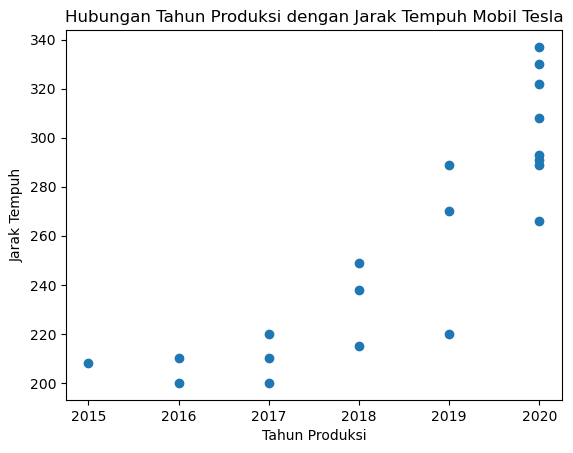

Statistik Deskriptif:
Model Year
2015    208.000000
2016    205.000000
2017    210.000000
2018    234.000000
2019    259.666667
2020    304.500000
Name: Electric Range, dtype: float64


In [95]:
plt.scatter(dataClean['Model Year'], dataClean['Electric Range'])
plt.xlabel('Tahun Produksi')
plt.ylabel('Jarak Tempuh')
plt.title('Hubungan Tahun Produksi dengan Jarak Tempuh Mobil Tesla')
plt.show()

average_range_by_year = dataClean.groupby('Model Year')['Electric Range'].mean()
print("Statistik Deskriptif:")
print(average_range_by_year)


dari Statistik Deskriptif diatas menggunakan Scatter plot menentukan hubungan tahun produksi dengan jarak tempuh menghasilkan bahwa pada tahun 2020 memiliki data paling banyak dengan Range yang jauh

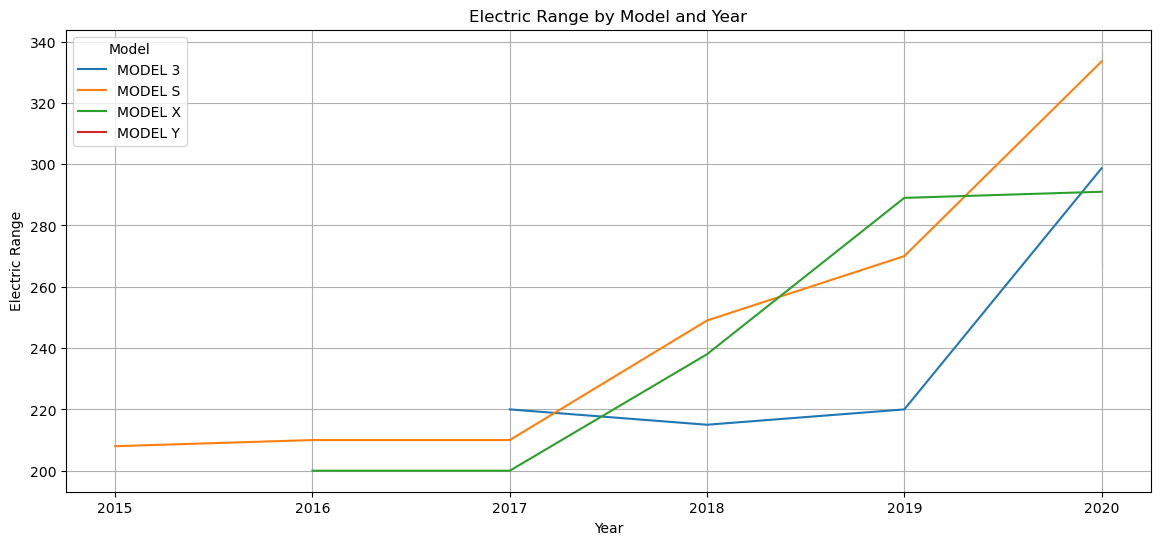

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('dataTesla.csv')

plt.figure(figsize=(14, 6))
sns.lineplot(data=data, x='Model Year', y='Electric Range', hue='Model', palette='tab10')
plt.title("Electric Range by Model and Year")
plt.xlabel("Year")
plt.ylabel("Electric Range")
plt.grid(True)
plt.legend(title='Model')
plt.show()

# Kode diatas untuk membuat ukuran grafik dari data dengan title "Electric Range by Model and Year"



Dari grafik diatas bahwa Model memiliki grafik yang terus naik setiap tahunnya dan grafik naik untuk Electric Rangenya.  
Untuk Model X memiliki kenaikan saat 2017 dan 2018 lalu stabil pada tahun 2019 dan untuk Model 3 sempat menurun grafiknya saat tahun 2017 hingga 2018 dan grafik naik saat 2019 ke 2020

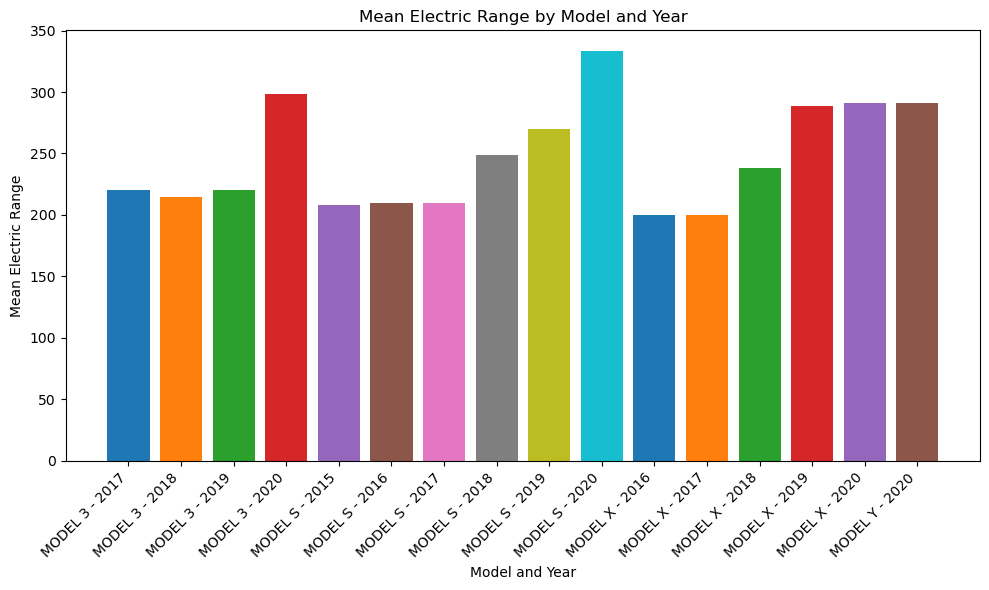

In [ ]:
# Groupby data Model dan Model Year dan menghitung Mean Electric Range
grouped = dataClean.groupby(['Model', 'Model Year'])['Electric Range'].mean().reset_index()

#Membuar Chart Bar
fig, ax = plt.subplots(figsize=(10, 6))

for name, group in grouped.iterrows():
    ax.bar(f"{group['Model']} - {group['Model Year']}", group['Electric Range'])

# Set labels dan title
ax.set_xlabel('Model and Year')
ax.set_ylabel('Mean Electric Range')
ax.set_title('Mean Electric Range by Model and Year')


plt.xticks(rotation=45, ha="right")

# Show plot
plt.tight_layout()
plt.show()



Dari Bar Chart diatas didapat bahwa Model S pada Tahun 2020 memiliki Mean paling tinggi diantara yang lain dan Model X pada tahun 2017 & 2018 memiliki Mean paling rendah

### Membuat bar untuk melihat banyaknya setiap Model Tesla di County

C:\Users\athal\AppData\Local\Temp\ipykernel_15332\2832326231.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Count County', y='Model', hue='Company', ci=None, palette='Set3')


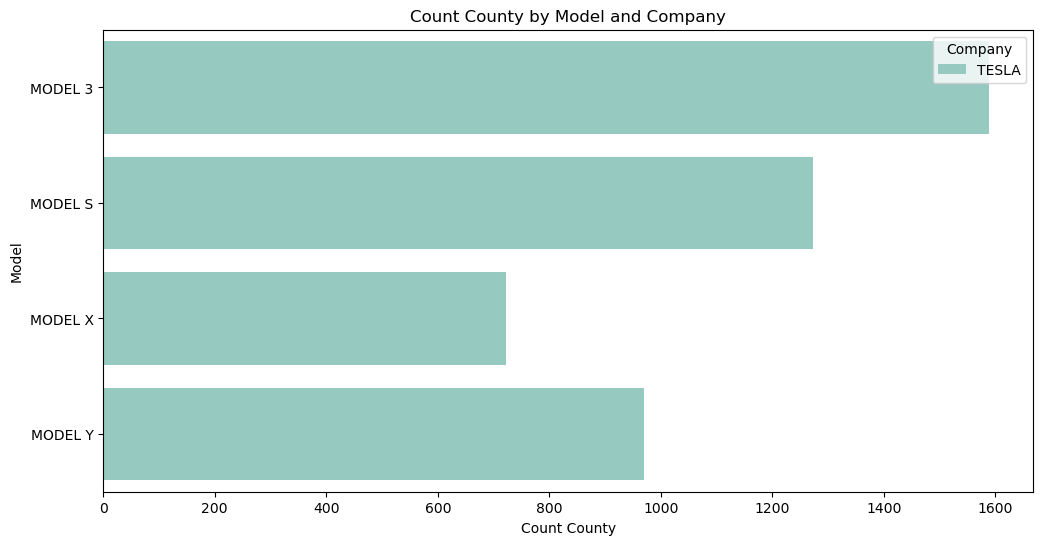

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('dataTesla.csv')

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Count County', y='Model', hue='Company', ci=None, palette='Set3')
plt.title("Count County by Model and Company")
plt.xlabel("Count County")
plt.ylabel("Model")
plt.legend(title='Company', loc='upper right')
plt.show()

Model 3 memiliki data paling banyak di Count County

### Membuat Heatmap

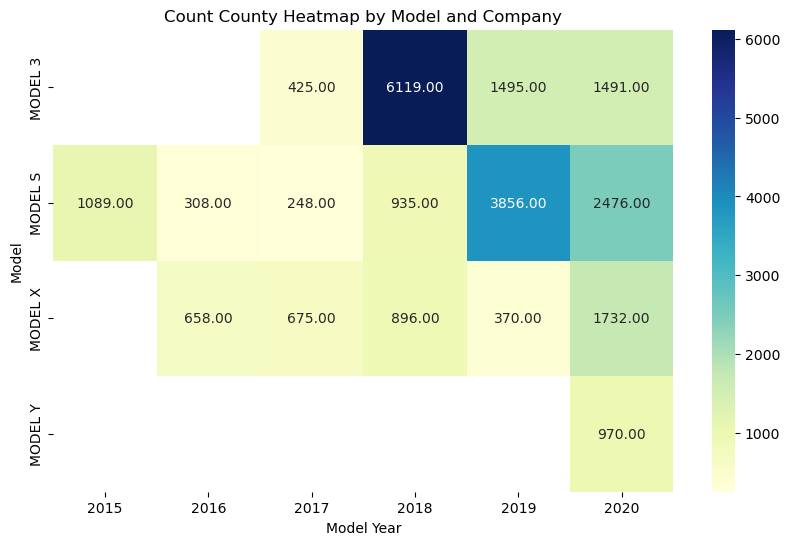

In [102]:
data = pd.read_csv('dataTesla.csv')

# Pivot the data to create a heatmap
heatmap_data = data.pivot_table(index='Model', columns='Model Year', values='Count County', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f', cbar=True)
plt.title("Count County Heatmap by Model and Company")
plt.xlabel("Model Year")
plt.ylabel("Model")
plt.show()

Dari Heatmap diatas Model 3 pada tahun 2018 menunjukan warna yang gelap diantar yang lain yang menyatakan bahwa Model 3 pada tahun 2018 yang memiliki data terbanyak yaitu 6119.00 dan Model S pada tahun 2017 memiliki warna yang paling terang yang menyatakan bahwa data tersebut paling dikit dengan data 248.00

### Kesimpulan

5 W 1 H

What : Analisa ini berkaitan dengan korelasi antara tahun produksi mobil dengan jarak tempuhnya pada mobil Tesla.

Why : Analisa ini dilakukan untuk mengukur mobil Tesla model apa dan tahun berapa yang baik dalam hal jarak tempuh.

Who : Tujuan analisa untuk meningkatkan penjualan mobil listrik Tesla sebesar 5% yang dapat dimanfaatkan dan diterima oleh perusahaan Tesla
      dan tim Sales.

When : Analisis ini dilakukan pada data tahun 2015 sampai 2020

Where : Analisis ini dilakukan pada data dari mobil Tesla yang diproduksi dalam beberapa tahun terakhir berdasarkan populasi di beberapa daerah

How : Analisis ini akan melibatkan pengubahan tipe data pada kolom 'Electric Range' dan 'Model Year', pengelompokkan data berdasarkan tahun, Penyebaran mobil Tesla, perhitungan rata-rata jarak tempuh untuk setiap tahun, dan pembuatan visualisasi data berupa grafik garis untuk menampilkan tren.



Kesimpulan :

1. Berdasarkan analisis yang sudah dilakukan bahwa terdapat hubungan antara tahun produksi mobil dengan jarak tempuhnya pada Company Tesla. Karena setiap modelnya memiliki kenaikan Electric Range di tiap tahunnya.

2. Mobil Tesla yang memiliki Electric Range terbanyak adalah Model S dengan tahun produksi 2020 yang tersebar di 2255 County

3. Dari analisis ini juga dapat meningkatkan penjualan mobil listrik tesla karena berdasarkan data, Tesla selalu memiliki kenaikan Electric Range tiap tahunnya di setiap model.

4. Dari analisis ini Model 3 memiliki penyebaran terbanyak dan Model X yang paling sedikit

Saran :

Company Tesla sebaiknya terus mengembangkan teknologi untuk Mobil listrik semua model untuk terus meningkatakan Sales. Company Tesla juga dapat meprioritaskan County yang memiliki Tesla terbanyak dan meningkatkan pemasaran pada County yang memiliki Tesla paling sedikit.

Link Dashboard Tableau : https://public.tableau.com/views/Milestone1-AthallaRafly/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link